In [5]:
import numpy as np
import matplotlib.pyplot as plt

import scipy

import copy

## Outliers via standard deviation threshold

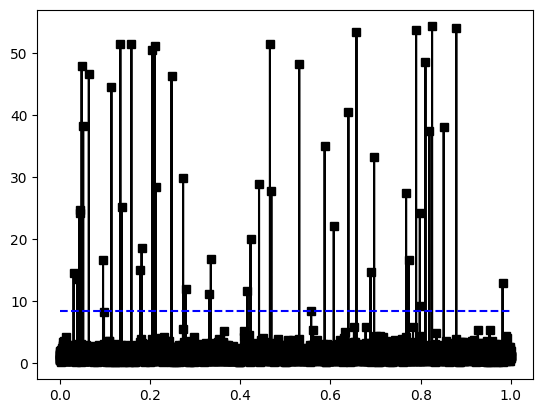

In [6]:
N = 10000
time = np.arange(0,N)/N
signal1 = np.exp( .5*np.random.randn(N) )

nOutliers = 50
randpnts = np.random.randint(0,N,nOutliers)
signal1[randpnts] = np.random.rand(nOutliers) * (np.max(signal1)-np.min(signal1))*10

plt.plot(time,signal1,'ks-')

threshold = np.mean(signal1) + 3*np.std(signal1)
plt.plot([time[0],time[-1]],[threshold,threshold],'b--')
plt.show()

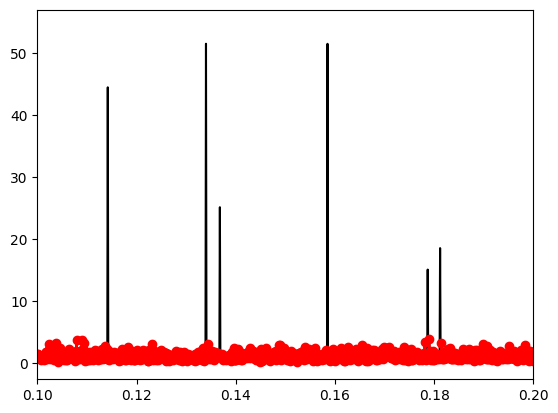

In [8]:
outliers = signal1 > threshold

signalR = copy.deepcopy( signal1 )
signalR[outliers] = scipy.interpolate.griddata(time[~outliers], signal1[~outliers], time[outliers], method='cubic')

plt.plot(time,signal1,'k-')
plt.plot(time,signalR,'ro-')
plt.xlim([.1,.2])
plt.show()

## Outliers via local threshold

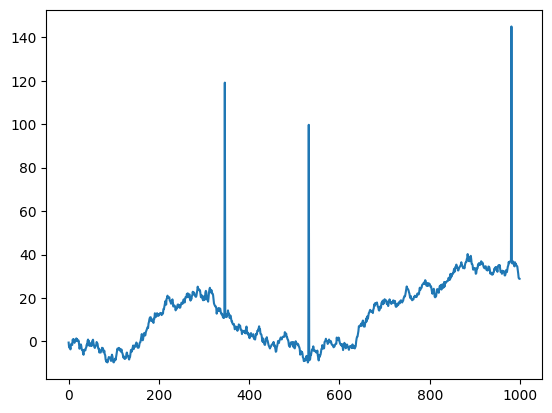

In [26]:
signal = np.cumsum(np.random.randn(1000))
N = len(signal)
time = np.arange(0,N)

outliers = np.random.randint(0,N,3) 

for i in outliers:
    signal[i] = signal[i] + (np.max(signal1)-np.min(signal1))*2

plt.plot(time,signal)
plt.show()

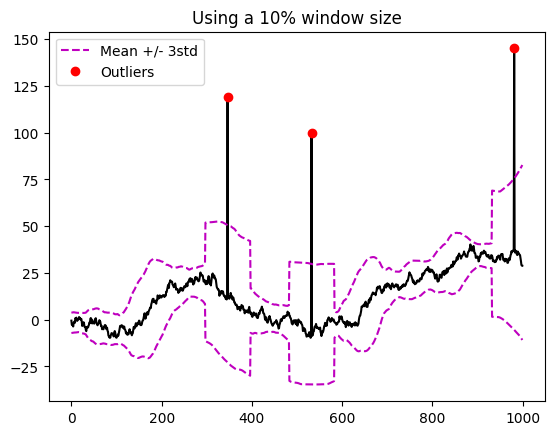

In [29]:
pct_win = 10 

k = int(len(signal) * (pct_win/2/100))

mean_ts = np.ones(len(time)) * np.mean(signal)
std3_ts = np.ones(len(time)) * np.std(signal)

for i in range(0,N):
    
    lo_bnd = np.max((0,i-k))
    hi_bnd = np.min((i+k,N))
    
    mean_ts[i] =  np.mean( signal[range(lo_bnd,hi_bnd)] )
    std3_ts[i] = 3*np.std( signal[range(lo_bnd,hi_bnd)] )

outliers = (signal > mean_ts+std3_ts) | (signal < mean_ts-std3_ts)


plt.plot(time,signal,'k')
plt.plot(time,mean_ts+std3_ts,'m--',label='Mean +/- 3std')
plt.plot(time,mean_ts-std3_ts,'m--')

# and plot those
plt.plot(time[outliers],signal[outliers],'ro',label='Outliers')

plt.legend()
plt.title('Using a %d%% window size' %pct_win)
plt.show()

## Outlier time windows via sliding RMS

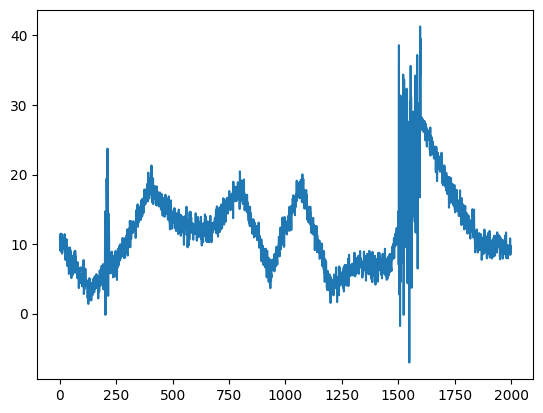

In [30]:
n = 2000
p = 15  

signal1 = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
signal1 = signal1 + np.random.randn(n)

signal1[200:221]   = signal1[200:221] + np.random.randn(21)*9
signal1[1500:1601] = signal1[1500:1601] + np.random.randn(101)*9

plt.plot(signal1)
plt.show()

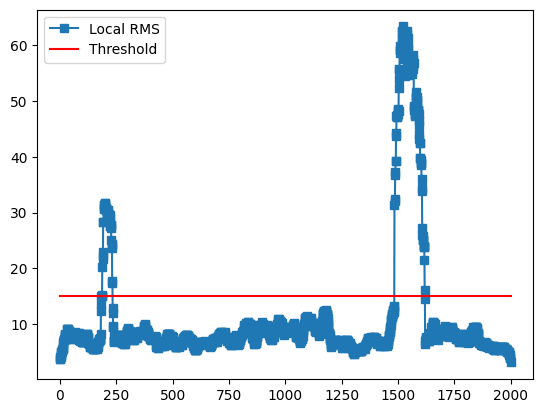

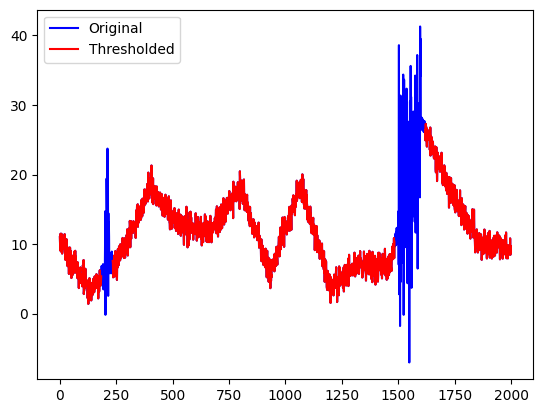

In [33]:
pct_win = 2  

k = int(n * (pct_win/2/100))

rms_ts = np.zeros(n)

for ti in range(0,n):
    
    low_bnd = int( np.max((0,ti-k)) )
    upp_bnd = int( np.min((n,ti+k)) )
    
    tmpsig = signal1[range(low_bnd,upp_bnd)]
    tmpsig = tmpsig - np.mean(tmpsig)
    
    rms_ts[ti] = np.sqrt(np.sum( tmpsig**2 ))


plt.plot(rms_ts,'s-',label='Local RMS')

thresh = 15
plt.plot([0,n],[thresh,thresh],'r',label='Threshold')
plt.legend()
plt.show()

signalR = copy.deepcopy( signal1 )
signalR[ rms_ts>thresh ] = np.nan

plt.plot(signal1,'b',label='Original')
plt.plot(signalR,'r',label='Thresholded')
plt.legend()
plt.show()